In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train_set.csv')


In [3]:
df.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166835 entries, 0 to 1166834
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1166835 non-null  int64 
 1   checkin         1166835 non-null  object
 2   checkout        1166835 non-null  object
 3   city_id         1166835 non-null  int64 
 4   device_class    1166835 non-null  object
 5   affiliate_id    1166835 non-null  int64 
 6   booker_country  1166835 non-null  object
 7   hotel_country   1166835 non-null  object
 8   utrip_id        1166835 non-null  object
dtypes: int64(3), object(6)
memory usage: 80.1+ MB


,user_id,city_id,affiliate_id
count,1.166835e+06,1.166835e+06,1.166835e+06
mean,3.129535e+06,3.347059e+04,5.719503e+03
std,1.808045e+06,1.958255e+04,3.964435e+03
min,2.900000e+01,2.000000e+00,5.000000e+00
25%,1.562185e+06,1.701300e+04,9.340000e+02
50%,3.126222e+06,3.228200e+04,6.309000e+03
75%,4.701432e+06,5.112800e+04,9.924000e+03
max,6.258087e+06,6.756500e+04,1.069700e+04


In [8]:
# Check for incomplete/null data
null_counts = df.isnull().sum()

# Create a DataFrame with column names and their corresponding null counts
null_info = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})

# Sort the DataFrame by null counts in descending order
sorted_null_info = null_info.sort_values(by='Null Count', ascending=False)

# Display the sorted information
print("Columns with null values and their counts:")
print(sorted_null_info)

Columns with null values and their counts:
           Column  Null Count
0         user_id           0
1         checkin           0
2        checkout           0
3         city_id           0
4    device_class           0
5    affiliate_id           0
6  booker_country           0
7   hotel_country           0
8        utrip_id           0


In [17]:
df['checkin'] = pd.to_datetime(df['checkin'])
df['checkout'] = pd.to_datetime(df['checkout'])

In [18]:
# New feature: trip_duration 
df['trip_duration'] = (df['checkout'] - df['checkin']).dt.days

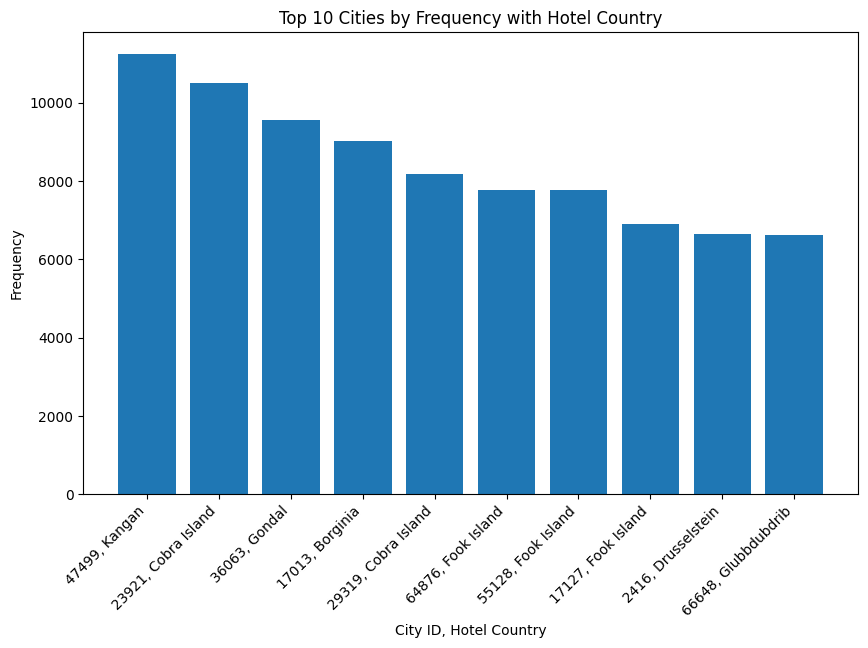

In [21]:
# Create a new DataFrame with city ID and hotel country
city_country_df = df[['city_id', 'hotel_country']]

# Group by city ID and hotel country, count occurrences, and select top 10
top_cities_countries = city_country_df.value_counts().head(10).reset_index(name='frequency')

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_cities_countries['city_id'].astype(str) + ', ' + top_cities_countries['hotel_country'], top_cities_countries['frequency'])
plt.xlabel('City ID, Hotel Country')
plt.ylabel('Frequency')
plt.title('Top 10 Cities by Frequency with Hotel Country')
plt.xticks(rotation=45, ha='right')
plt.show()

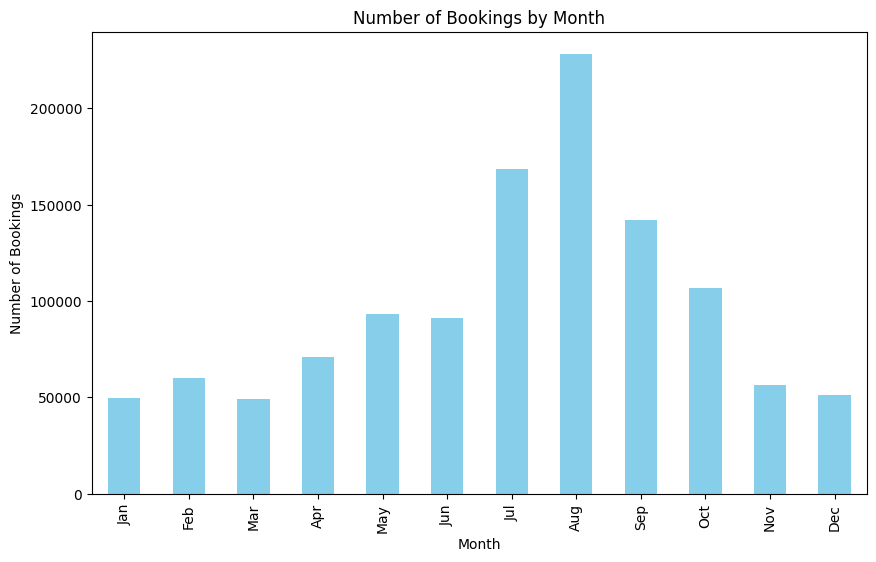

In [9]:
# Group  data by month and count the number of bookings
monthly_bookings = df['checkin_month'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot bar graph
monthly_bookings.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(12), months)  # Replace x-axis labels with month names
plt.show()

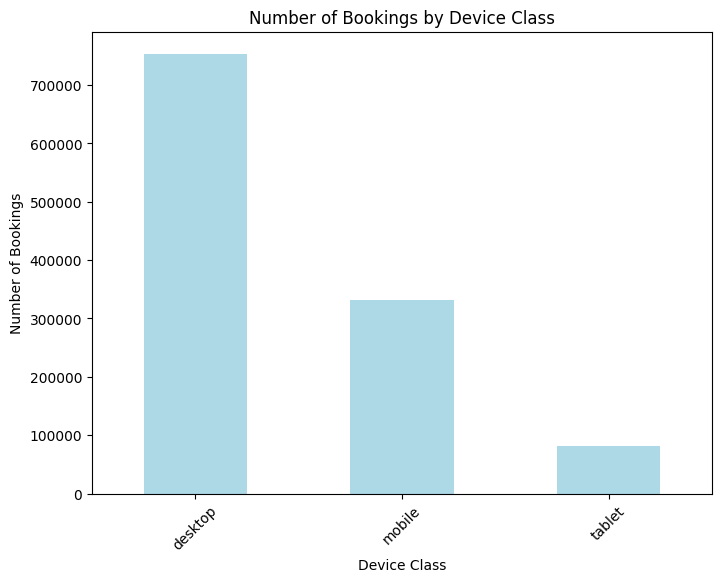

In [14]:
# Number of bookings for each device class
device_counts = df['device_class'].value_counts()

# Plot  bar graph
device_counts.plot(kind='bar', figsize=(8, 6), color='lightblue')
plt.title('Number of Bookings by Device Class')
plt.xlabel('Device Class')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

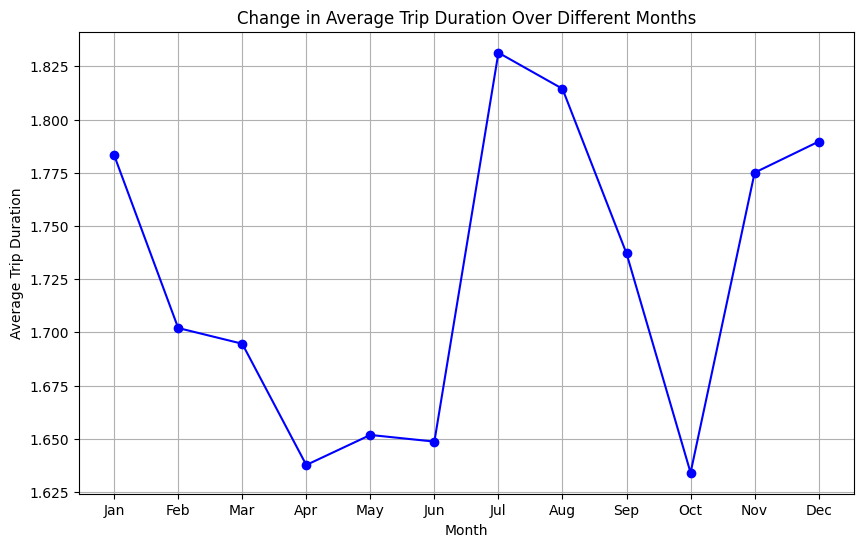

In [19]:
# Check seasonality
df['checkin_month'] = df['checkin'].dt.month

# Calculate the average trip duration for each month
average_trip_duration = df.groupby('checkin_month')['trip_duration'].mean()

# Plot the change in trip duration over different months
plt.figure(figsize=(10, 6))
average_trip_duration.plot(kind='line', marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration')
plt.title('Change in Average Trip Duration Over Different Months')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

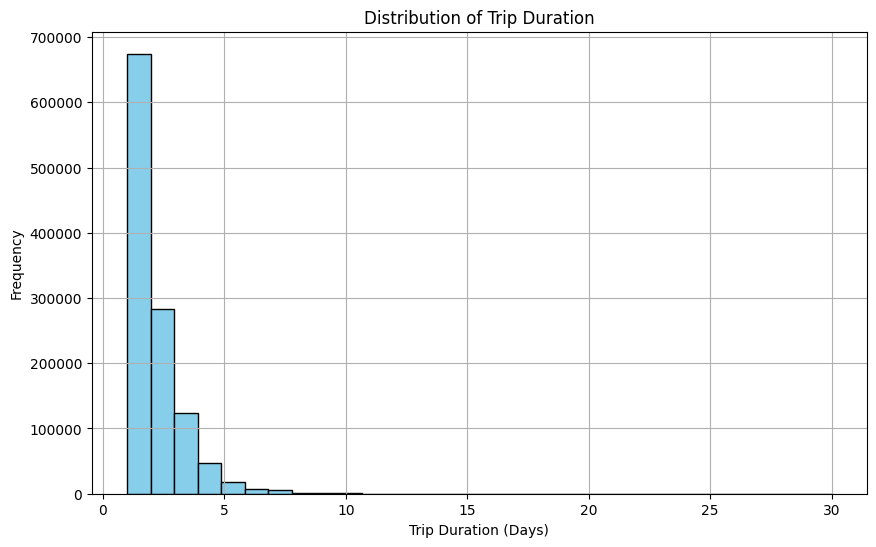

In [20]:
# Distribution of Trip Length (in days)
plt.figure(figsize=(10, 6))
plt.hist(df['trip_duration'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Trip Duration (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.grid(True)
plt.show()

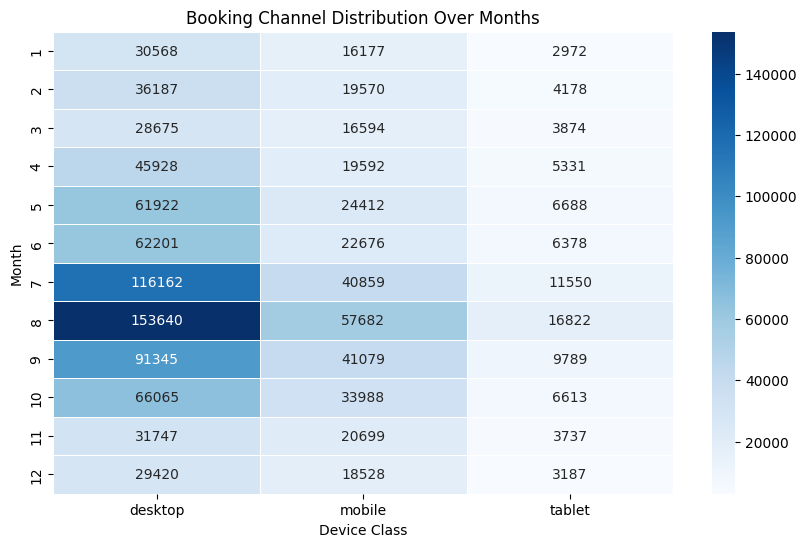

In [22]:
pivot_table = df.pivot_table(index='checkin_month', columns='device_class', aggfunc='size')

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title('Booking Channel Distribution Over Months')
plt.xlabel('Device Class')
plt.ylabel('Month')
plt.show()

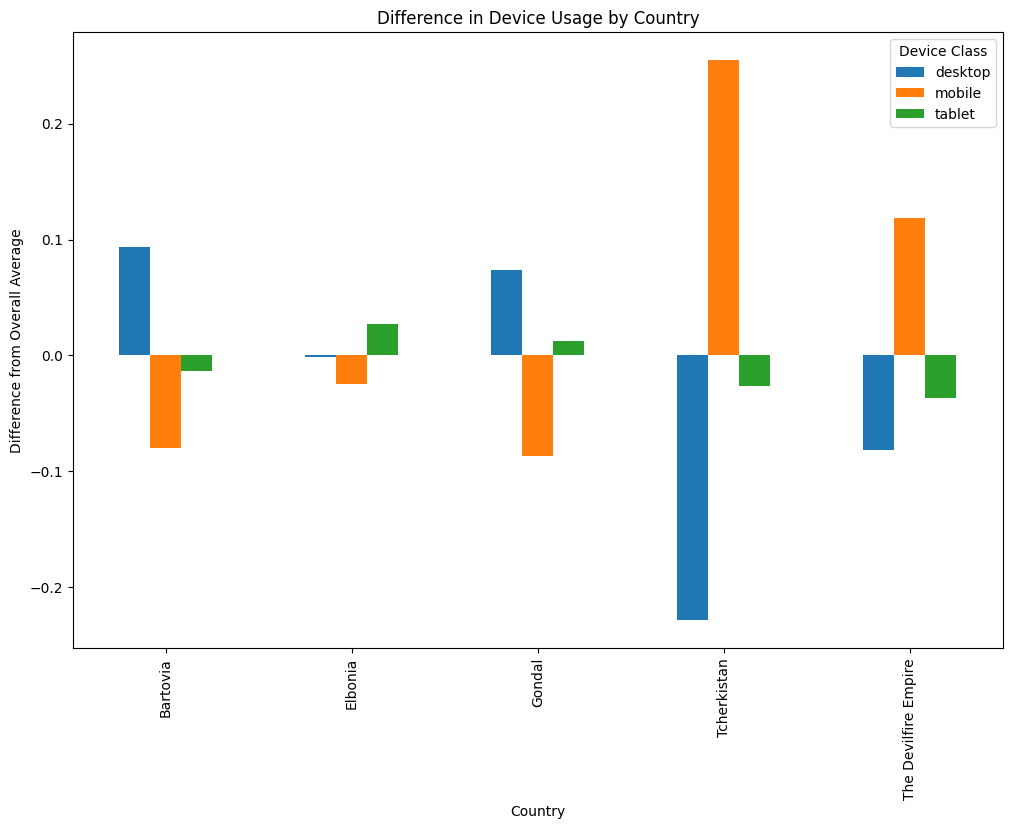

In [23]:
# Calculate overall average proportion of each device class
overall_avg_device = df['device_class'].value_counts(normalize=True)

# Calculate proportion of each device class used by each country
device_proportion_by_country = df.groupby('booker_country')['device_class'].value_counts(normalize=True).unstack().fillna(0)

# Calculate difference between each country's device proportion and overall average
device_difference = device_proportion_by_country.sub(overall_avg_device)

device_difference.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Country')
plt.ylabel('Difference from Overall Average')
plt.title('Difference in Device Usage by Country')
plt.legend(title='Device Class')
plt.show()

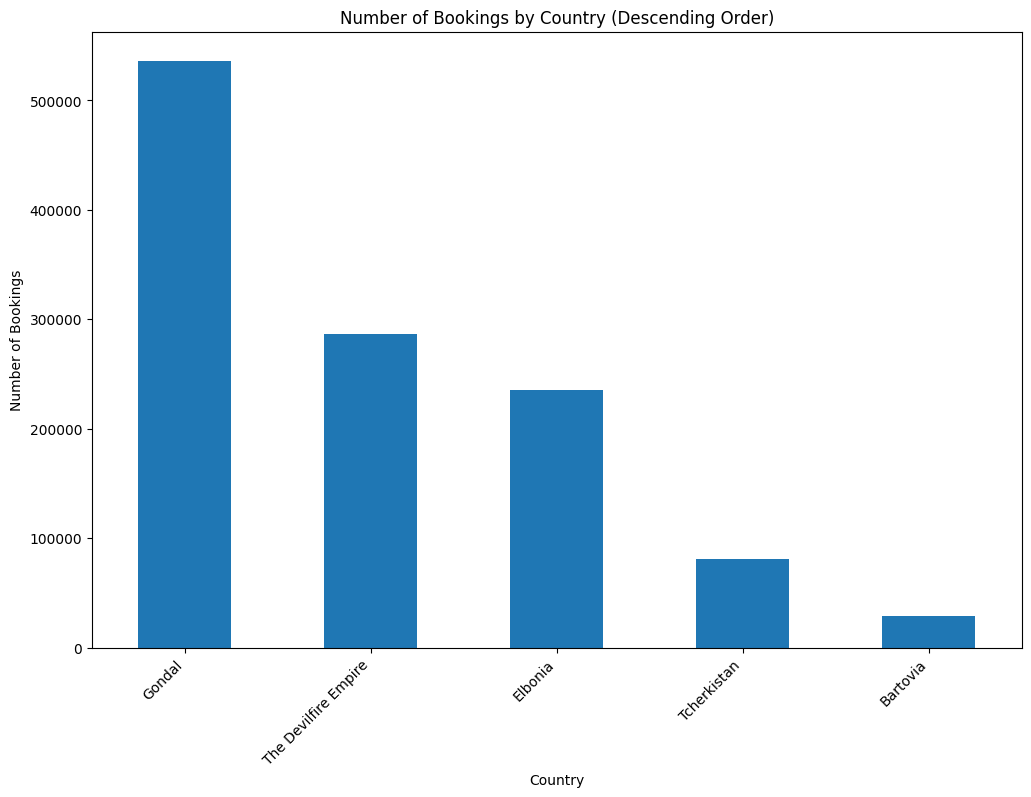

In [26]:
# Calculate number of bookings for each country
country_bookings = df['booker_country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
country_bookings.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Country (Descending Order)')
plt.xticks(rotation=45, ha='right') 
plt.show()